# Analýza datasetu DIDA
DIDA je najrobustnejší dataset obsahujúci ručne písané číslice. Je využívaný pri trénovaní obraz-spracujúcich systémov, pričom jadrom tohto využitia je strojové učenie. Jeho autorom sú Huseyin Kusetogullari, Amir Yavariabdi, Johan Hall, Niklas Lavesson-Big Data Research.
#### <span style="color: blue;">Štruktúra:</span>
Dataset je tvorený 252860 vzorkami rukou písaných číslic.
#### <span style="color: blue;">Formát vzorky:</span>
Vzorky číslic datasetu majú rôzne veľkosti a naturálny farebný formár RGB.
#### <span style="color: blue;">Pôvod:</span>
Dataset DIDA bol vytvorený v roku 2020 extrahovaním vzoriek zo 75 000 švédskych historických dokumentov vytvorených v rokoch 1800 až 1940.

---
## Importovanie modulov:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#príkaz umožnujúci embedded inline kompiláciu modulu matplotlib
%matplotlib inline

---
## Štruktúra datasetu:
Dataset DIDA tvorí 10 podpriečinkov pre každú triedu, ktoré obsahujú .jpg súbory reprezentujúce vzorky číslic v rôznych veľkostiach.

In [2]:
dida_path = "/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/DIDA"
for root, dirs, files in os.walk(dida_path):
        level = root.replace(dida_path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)

DIDA/
    9/
    0/
    7/
    6/
    1/
    8/
    4/
    3/
    2/
    5/


---
## Vizualizácia vzoriek dát (číslic):
Do premennej __img_1__ sme priamo načítali obrázok číslice z konkrétneho podpriečinka.

In [4]:
image_list = os.listdir("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/DIDA/7")
img_1 = mpimg.imread(f"/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/DIDA/7/{image_list[7]}")

print(f"Label: 7")
print(img_1)

Label: 7
[[[158 146 108]
  [158 146 108]
  [158 146 108]
  ...
  [157 148 109]
  [157 148 109]
  [157 148 109]]

 [[158 146 108]
  [158 146 108]
  [158 146 106]
  ...
  [157 148 109]
  [156 147 108]
  [156 147 108]]

 [[158 146 106]
  [158 146 106]
  [158 146 106]
  ...
  [157 148 109]
  [155 146 107]
  [155 146 107]]

 ...

 [[158 149 108]
  [158 149 108]
  [158 149 108]
  ...
  [156 147 106]
  [157 148 107]
  [157 148 107]]

 [[158 149 108]
  [158 149 108]
  [158 149 108]
  ...
  [156 147 106]
  [157 148 107]
  [157 148 107]]

 [[158 149 108]
  [158 149 108]
  [158 149 108]
  ...
  [156 147 106]
  [157 148 107]
  [157 148 107]]]


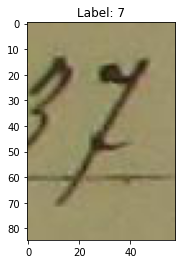

In [5]:
#vizualizácia bez použitia dodatočného filtru
plt.title(f"Label: 7")
plt.imshow(img_1)

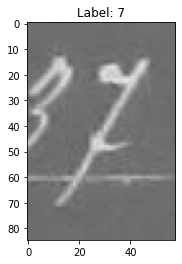

In [6]:
#vizualizácia s použitím čiernobieleho filtra "gray" a inverzie
plt.title(f"Label: 7")
plt.imshow(1-img_1[:,:,1], cmap='gray', vmin = 0, vmax = 255)

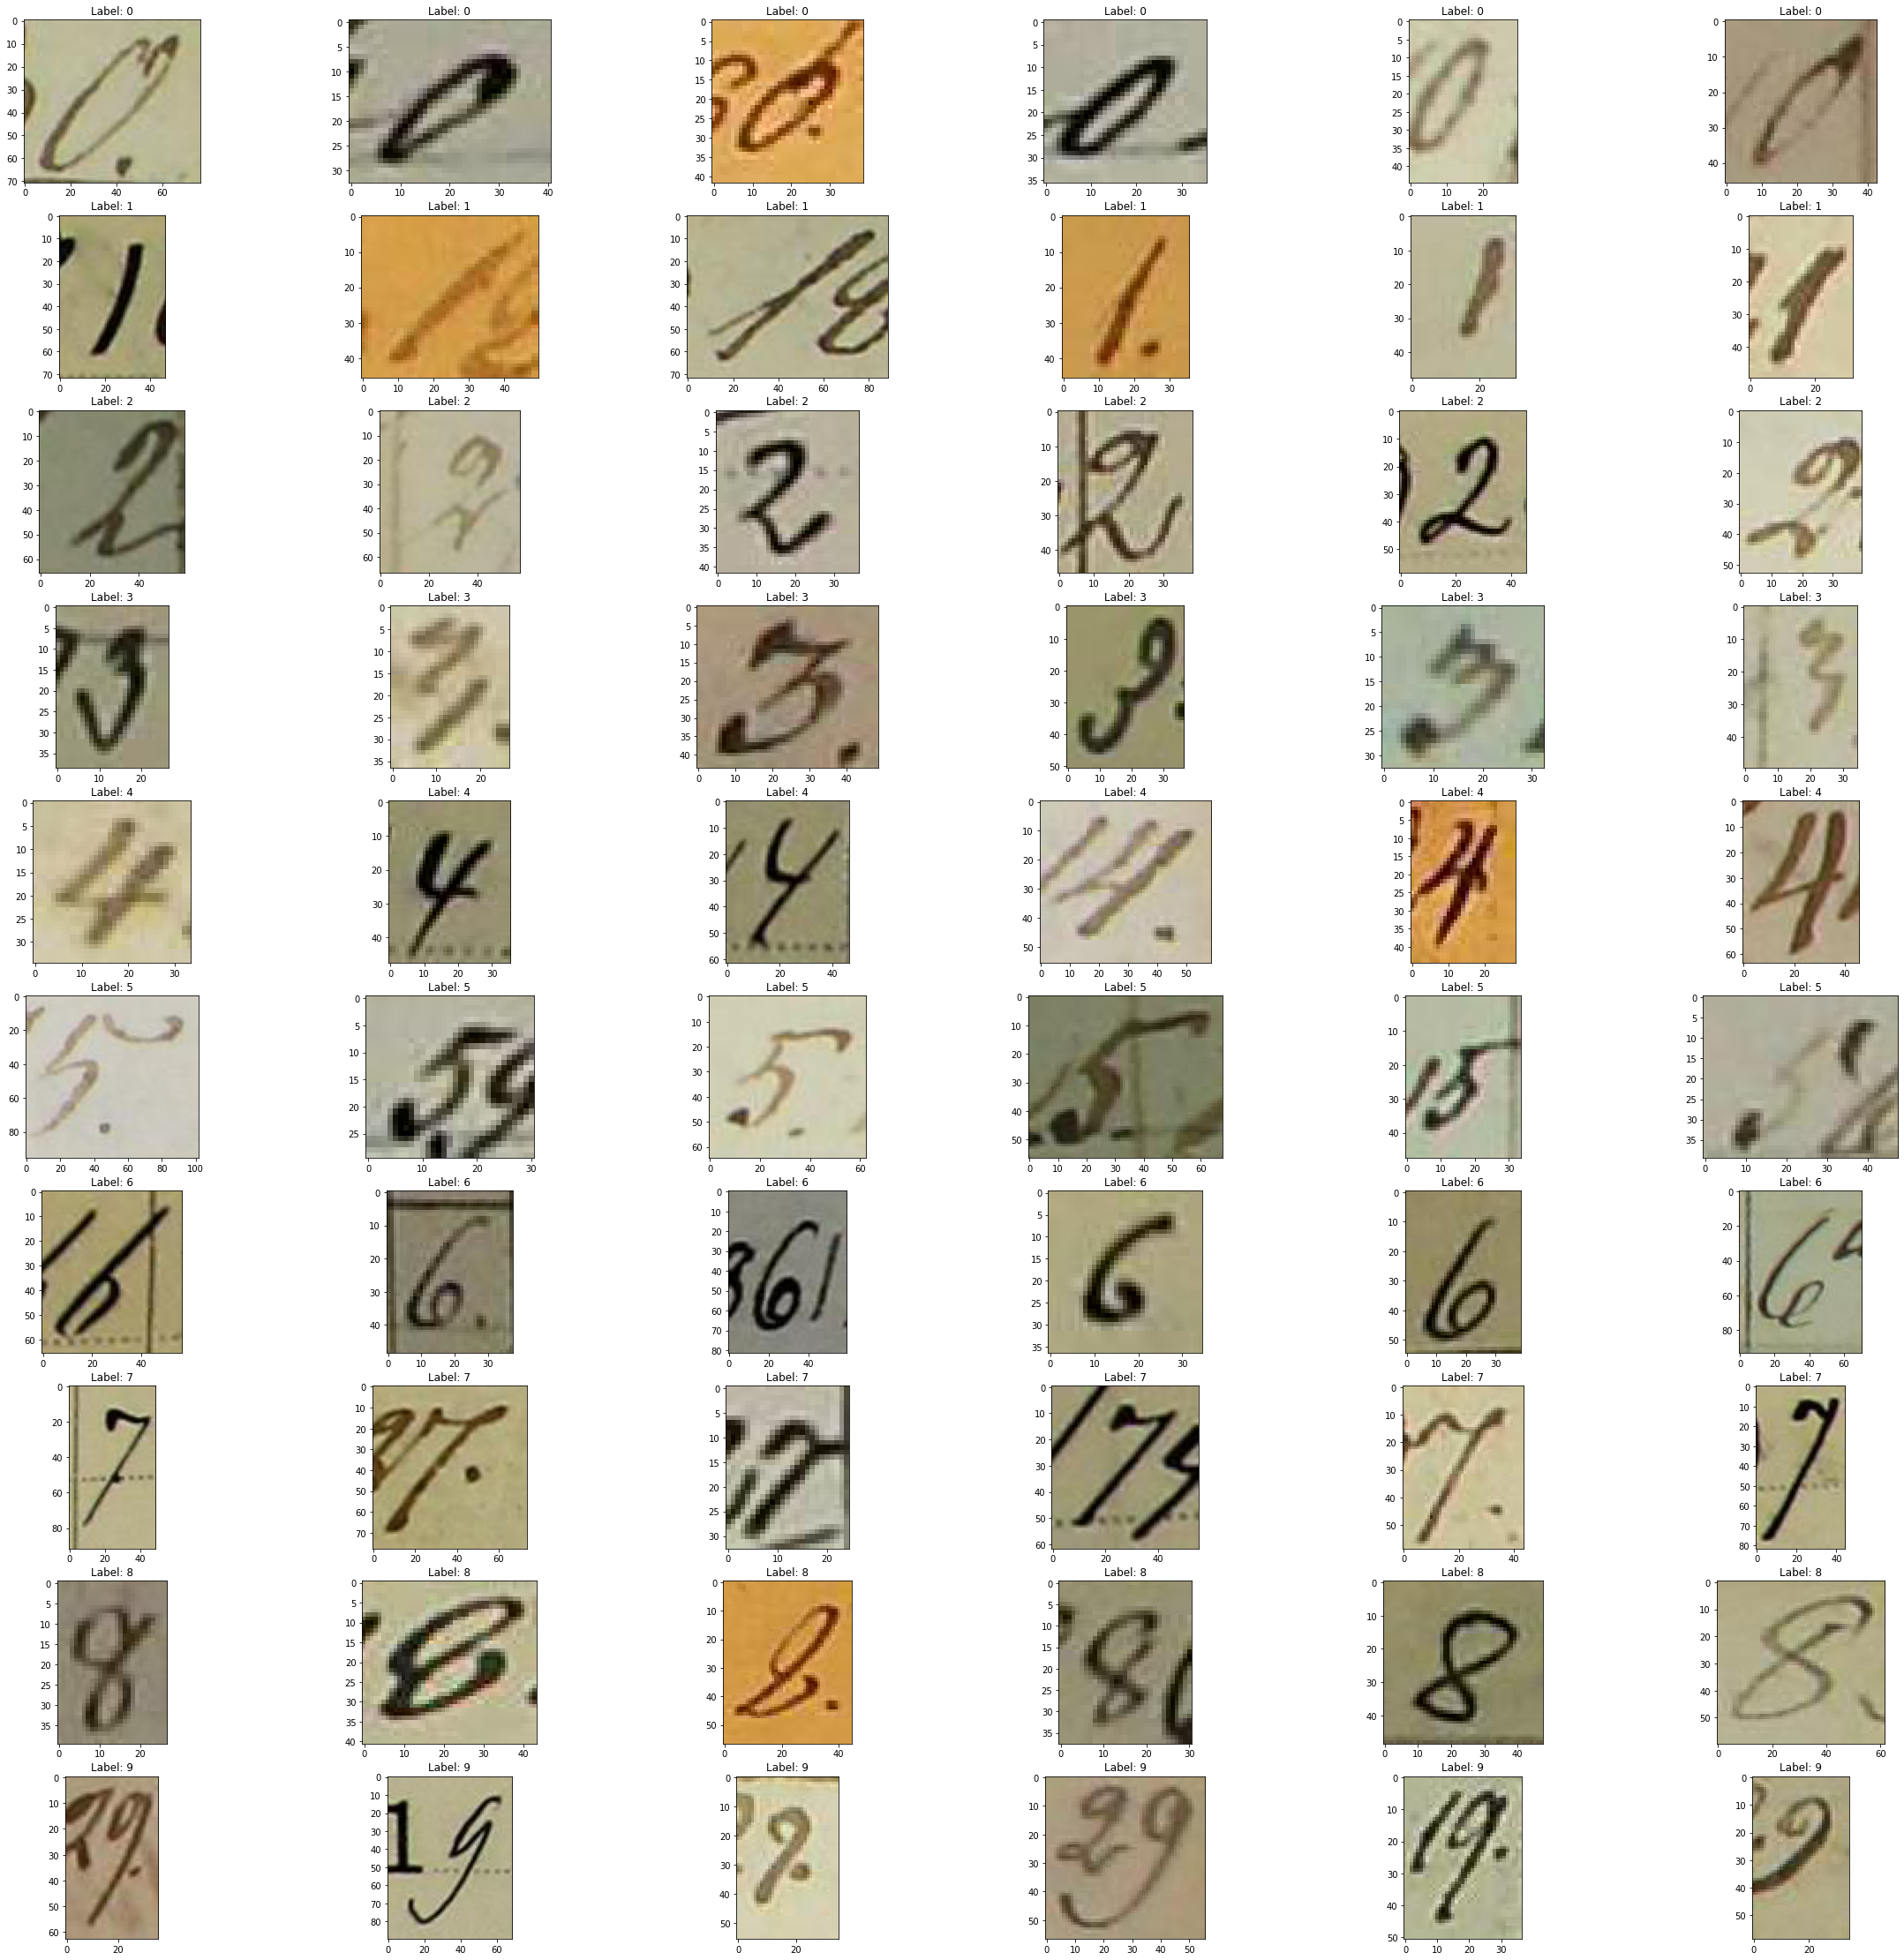

In [7]:
#vizualizácia v mriežke bez použitia dodatočného filtru
f, axarr = plt.subplots(10, 6, figsize=(40,40))

for i in range(0, 10):
    counter = 1
    for j in range(0, 6):
        axarr[i, j].set_title(f"Label: {i}")
        tmp_image_list = os.listdir(f"/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/DIDA/{i}")
        tmp_img = mpimg.imread(f"/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/DIDA/{i}/{tmp_image_list[counter]}")
        axarr[i, j].imshow(tmp_img)
        counter *= 2

Z vizualizácie vzoriek je patrné, že dáta sú v úplne "surovej" forme, kde neprešli žiadnou normalizáciou, transformáciou ani úpravou. Rámce s číslicami obsahujú časti iných číslíc a šum, pričom samotné čísla sú rôznej hrúbky a podklad rôznej farby a štruktúry.

---
## Rozbor datasetu:
Pri datasetoch určených na použitie pri strojovom učení je dôležitá ich vhodná robustnosť a škálovanie, ktoré dokážu pri vhodnej optimalizácii daného systému (neurónová sieť...) maximalizovať úspešnosť klasifikácie a minimalizovať trénovaci čas.
<br>Dataset DIDA vo svojej jedinnej sade obsahuje relatívne rovnomerný počet vzoriek.

Text(0.5, 0.98, 'Početnosť vzoriek číslic v datasete')

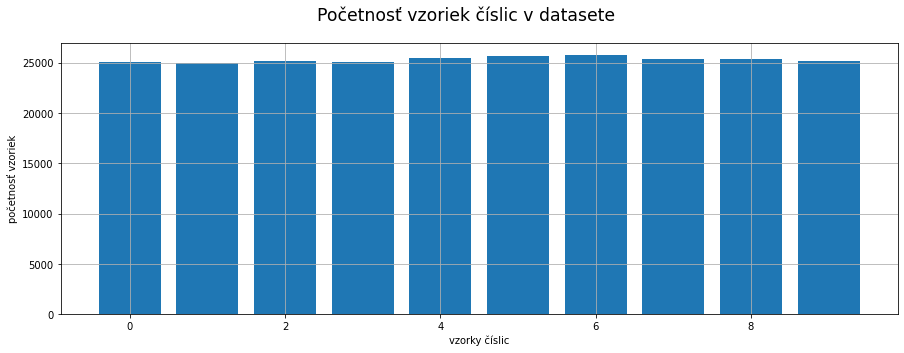

In [8]:
#vytvorenie polí na zobrazenie histogramu(stĺpcového grafu)
labels = []
counts = []
for i in range(0, 10):
    labels.append(i)
    tmp_image_list = os.listdir(f"/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/DIDA/{i}")
    counts.append(len(tmp_image_list))  

#zobrazenie histogramu(stĺpcového grafu) zo zvolených údajov
plt.figure(figsize=(15, 5))
plt.grid()
plt.bar(labels, counts)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v datasete", ha="center", fontsize="xx-large")

In [9]:
print("Početnosť vzoriek číslic v datasete:")
sum_of_count = 0
for i in range(0,10):
    count = counts[i]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v datasete:
 - počet vzoriek čísla 0: 25040
 - počet vzoriek čísla 1: 25002
 - počet vzoriek čísla 2: 25152
 - počet vzoriek čísla 3: 25049
 - počet vzoriek čísla 4: 25408
 - počet vzoriek čísla 5: 25689
 - počet vzoriek čísla 6: 25706
 - počet vzoriek čísla 7: 25343
 - počet vzoriek čísla 8: 25364
 - počet vzoriek čísla 9: 25107

Priemerný počet vzoriek: 25286.0


---
## Zdroje:

Huseyin Kusetogullari, Amir Yavariabdi, Johan Hall, Niklas Lavesson, “DIGITNET: A Deep Handwritten Digit Detection and Recognition Method Using a New Historical Handwritten Digit Dataset”, Big Data Research, 2020, DOI: 10.1016/j.bdr.2020.100182.
<br><br>
Huseyin Kusetogullari, Amir Yavariabdi, Johan Hall, Niklas Lavesson, DIDA: The largest historical handwritten digit dataset with 250k digits, June 2021. Accessed on: June 13, 2021.